In [1]:
from matplotlib import gridspec
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib.dates as mdate
plt.style.use('seaborn')

In [2]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
con = create_engine('mysql+pymysql://root:@127.0.0.1:3306/LiuNian') 

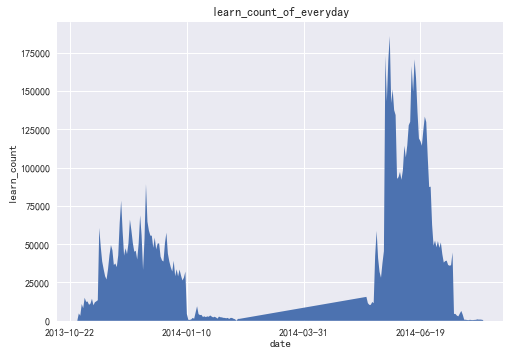

In [3]:
sql="select COUNT(*) learn_count,substr(TIME,1,10) time from LOG_TRAIN group by substr(TIME,1,10) order by substr(TIME,1,10)" 
df=pd.read_sql(sql,con) 
df["time"] = pd.to_datetime(df["time"])
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))   #设置时间标签显示格式
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=80)) #间隔设置
ax.stackplot(df["time"],df["learn_count"]) 
ax.set_ylabel("learn_count")  #学习次数
ax.set_xlabel("date")   #日期
ax.set_title("learn_count_of_everyday")    #每日学习次数
plt.show() 

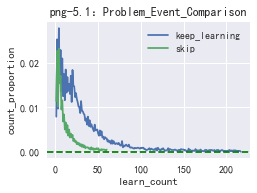

In [4]:
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0,0]) 
problem0=pd.read_sql("select problem,count(problem)/24961 rate from statistical_information \
where lable=0 and problem<(select avg(problem)+3*stddev(problem) from statistical_information where lable=0) and PROBLEM>0 \
group by(problem) \
order by (problem)",con) 
problem1=pd.read_sql("select problem,count(problem)/95581 rate from statistical_information \
where lable=1 and problem<(select avg(problem)+3*stddev(problem) from statistical_information where lable=1) and PROBLEM>0 \
group by(problem) \
order by(problem)",con) 
ax1.plot(problem0["problem"],problem0["rate"],label="keep_learning") 
ax1.plot(problem1["problem"],problem1["rate"],label="skip") 
ax1.set_xlabel("learn_count")   #学习次数
ax1.set_ylabel("count_proportion")      #该学习次数占比
ax1.set_title("png-5.1: Problem_Event_Comparison")     #图5.1 :problem事件对比情况
ax1.axhline(y=0,c='g',ls='--')
plt.legend() 

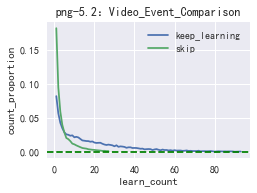

In [5]:
video0=pd.read_sql("select VIDEO,count(VIDEO)/24961 rate from statistical_information \
where lable=0 and VIDEO<(select avg(VIDEO)+3*stddev(VIDEO) from statistical_information where lable=0) and VIDEO>0 \
group by(VIDEO) \
order by(VIDEO)",con) 
video1=pd.read_sql("select VIDEO,count(VIDEO)/95581 rate from statistical_information \
where lable=1 and VIDEO<(select avg(VIDEO)+3*stddev(VIDEO) from statistical_information where lable=1) and VIDEO>0 \
group by(VIDEO) \
order by(VIDEO)",con) 
ax2 = plt.subplot(gs[0,1]) 
ax2.plot(video0["VIDEO"],video0["rate"],label="keep_learning") 
ax2.plot(video1["VIDEO"],video1["rate"],label="skip") 
ax2.set_xlabel("learn_count") 
ax2.set_ylabel("count_proportion") 
ax2.set_title("png-5.2: Video_Event_Comparison")   #图5.2；video事件对比情况
ax2.axhline(y=0,c='g',ls='--')
plt.legend() 

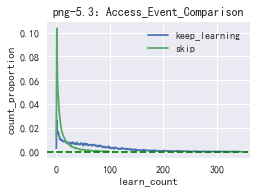

In [6]:
access0=pd.read_sql("select access1,count(access1)/24961 rate from statistical_information \
where lable=0 and access1<(select avg(access1)+3*stddev(access1) from statistical_information where lable=0) and access1>0 \
group by(access1) \
order by(access1)",con) 
access1=pd.read_sql("select access1,count(access1)/95581 rate from statistical_information \
where lable=1 and access1<(select avg(access1)+3*stddev(access1) from statistical_information where lable=1) and access1>0 \
group by(access1) \
order by(access1)",con) 
ax3 = plt.subplot(gs[1,0]) 
ax3.plot(access0["access1"],access0["rate"],label="keep_learning") 
ax3.plot(access1["access1"],access1["rate"],label="skip") 
ax3.set_xlabel("learn_count") 
ax3.set_ylabel("count_proportion") 
ax3.set_title("png-5.3 :Access_Event_Comparison")  #图5.3 :access事件对比情况
ax3.axhline(y=0,c='g',ls='--')
plt.legend() 

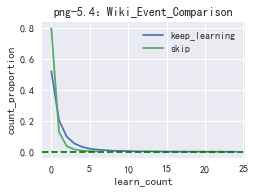

In [7]:
wiki0=pd.read_sql("select wiki,count(wiki)/24961 rate from statistical_information \
where lable=0 and wiki<(select avg(wiki)+3*stddev(wiki) from statistical_information where lable=0) and wiki>=0 \
group by(wiki) \
order by(wiki)",con) 
wiki1=pd.read_sql("select wiki,count(wiki)/95581 rate from statistical_information \
where lable=1 and wiki<(select avg(wiki)+3*stddev(wiki) from statistical_information where lable=1) and wiki>=0 \
group by(wiki) \
order by(wiki)",con) 
ax4 = plt.subplot(gs[1,1]) 
ax4.plot(wiki0["wiki"],wiki0["rate"],label="keep_learning") 
ax4.plot(wiki1["wiki"],wiki1["rate"],label="skip") 
ax4.set_xlabel("learn_count") 
ax4.set_ylabel("count_proportion") 
ax4.set_title("png-5.4 :Wiki_Event_Comparison")    #图5.4 :wiki事件对比情况
ax4.axhline(y=0,c='g',ls='--')
plt.legend() 

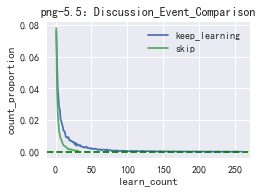

In [8]:
gs = gridspec.GridSpec(2, 2)
discussion0=pd.read_sql("select discussion,count(discussion)/24961 rate from statistical_information \
where lable=0 and discussion<(select avg(discussion)+3*stddev(discussion) from statistical_information where lable=0) and discussion>0 \
group by(discussion) \
order by(discussion)",con) 
discussion1=pd.read_sql("select discussion,count(discussion)/95581 rate from statistical_information \
where lable=1 and discussion<(select avg(discussion)+3*stddev(discussion) from statistical_information where lable=1) and discussion>0 \
group by(discussion) \
order by(discussion)",con) 
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(discussion0["discussion"],discussion0["rate"],label="keep_learning") 
ax1.plot(discussion1["discussion"],discussion1["rate"],label="skip") 
ax1.set_xlabel("learn_count") 
ax1.set_ylabel("count_proportion") 
ax1.set_title("png-5.5 :Discussion_Event_Comparison")     #图5.5 :discussion事件对比情况
ax1.axhline(y=0,c='g',ls='--')
plt.legend() 

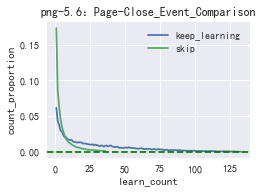

In [9]:
page_close0=pd.read_sql("select page_close,count(page_close)/24961 rate from statistical_information \
where lable=0 and page_close<(select avg(page_close)+3*stddev(page_close) from statistical_information where lable=0) and page_close>0 \
group by(page_close) \
order by(page_close)",con) 
page_close1=pd.read_sql("select page_close,count(page_close)/95581 rate from statistical_information \
where lable=1 and page_close<(select avg(page_close)+3*stddev(page_close) from statistical_information where lable=1) and page_close>0 \
group by(page_close) \
order by(page_close)",con) 
ax2 = plt.subplot(gs[0,1]) 
ax2.plot(page_close0["page_close"],page_close0["rate"],label="keep_learning") 
ax2.plot(page_close1["page_close"],page_close1["rate"],label="skip") 
ax2.set_xlabel("learn_count") 
ax2.set_ylabel("count_proportion") 
ax2.set_title("png-5.6 :Page-Close_Event_Comparison")  #图5.6 :page_close事件对比情况
ax2.axhline(y=0,c='g',ls='--')
plt.legend() 

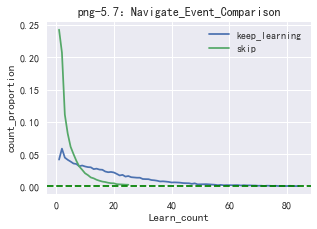

In [10]:
navigate0=pd.read_sql("select navigate,count(navigate)/24961 rate from statistical_information \
where lable=0 and navigate<(select avg(navigate)+3*stddev(navigate) from statistical_information where lable=0) and navigate>0 \
group by(navigate) \
order by(navigate)",con) 
navigate1=pd.read_sql("select navigate,count(navigate)/95581 rate from statistical_information \
where lable=1 and navigate<(select avg(navigate)+3*stddev(navigate) from statistical_information where lable=1) and navigate>0 \
group by(navigate) \
order by(navigate)",con) 
ax3 = plt.subplot(gs[1,0]) 
ax3.plot(navigate0["navigate"],navigate0["rate"],label="keep_learning") 
ax3.plot(navigate1["navigate"],navigate1["rate"],label="skip") 
ax3.set_xlabel("Learn_count") 
ax3.set_ylabel("count_proportion") 
ax3.set_title("png-5.7 :Navigate_Event_Comparison")    #图5.7 :navigate事件对比情况
ax3.axhline(y=0,c='g',ls='--')
plt.tight_layout(pad=0.3,h_pad=0.3,w_pad=0.3)
plt.legend() 
plt.show() 


No handles with labels found to put in legend.


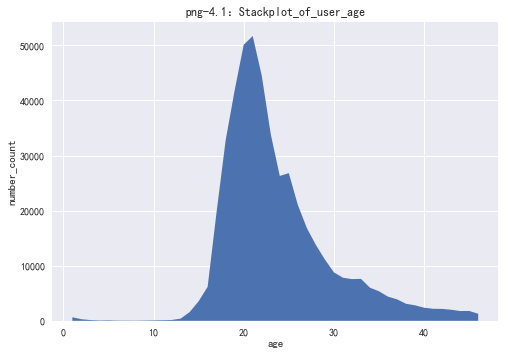

In [11]:
df=pd.read_sql("select 2015-BIRTH age,count(BIRTH) count \
from USER_INFO \
where 2015-BIRTH>0 and 2015-BIRTH<(select avg(2015-BIRTH)+3*stddev(2015-BIRTH) from USER_INFO where 2015-BIRTH>0) \
group by (BIRTH) \
order by age",con) 
plt.stackplot(df["age"],df["count"]) 
plt.xlabel("age")   #年龄
plt.ylabel("number_count")    #人数
plt.title("png-4.1 :Stackplot_of_user_age")    #图4.1 :用户年龄分布
plt.legend() 
plt.show() 

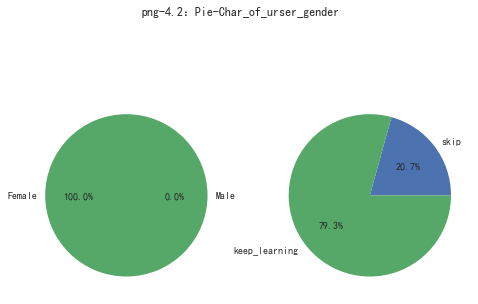

In [12]:
gs = gridspec.GridSpec(1, 2)
fig=plt.figure() 
ax1=plt.subplot(gs[0,0])
df=pd.read_sql("select GENDER,count(GENDER) count \
from USER_INFO \
group by (GENDER)",con) 
ax1.pie([df.loc[0,"count"],df.loc[2,"count"]],labels=["Male","Female"],autopct='%3.1f%%') 
ax2=plt.subplot(gs[0,1])
df1=pd.read_sql("select lable,count(lable) count \
from TRUTH_TRAIN \
group by (lable)",con) 
ax2.pie([df1.loc[0,"count"],df1.loc[1,"count"]],labels=["skip","keep_learning"],autopct='%3.1f%%')
fig.suptitle("png-4.2 :Pie-Char_of_urser_gender")   #图4.2 :用户性别与翘课标签分布
plt.show()

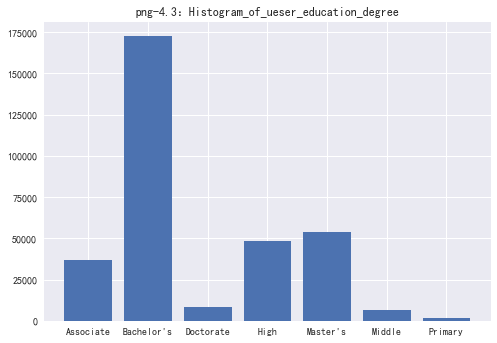

In [13]:
df=pd.read_sql("select EDUCATION,count(EDUCATION) count \
from USER_INFO \
where EDUCATION is not null \
group by EDUCATION",con) 
plt.bar(df["EDUCATION"],df["count"]) 
plt.title("png-4.3 :Histogram_of_ueser_education_degree")   #图4.3 :用户学历分布
plt.show() 

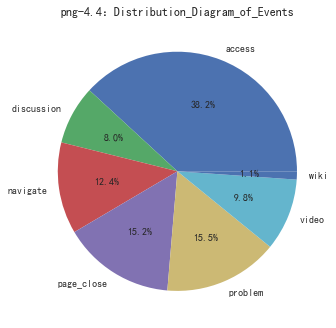

In [14]:
df=pd.read_sql("select EVENT,count(EVENT) count \
from LOG_TRAIN \
group by EVENT",con) 
plt.pie(labels=df["EVENT"],x=df["count"],autopct='%3.1f%%') 
plt.title("png-4.4 :Distribution_Diagram_of_Events")    #图4.4 :事件分布
plt.show() 
